# FFT Notes
## 10-23-24

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
L = 20
n = 128
x2 = np.linspace(-L/2, L/2, n + 1)
x = x2[:n]

Things to think about when using FFT
* Periodic boundaries 
* shifting

In [5]:
u = np.exp(-x*x)

ut = np.fft.fft(u)

utshift = np.fft.fftshift(ut)

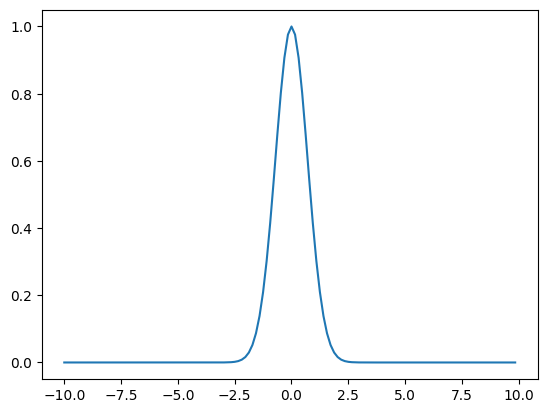

/Users/hunterlybbert/.pyenv/versions/3.11.8/envs/uw-dev-env/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/hunterlybbert/.pyenv/versions/3.11.8/envs/uw-dev-env/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


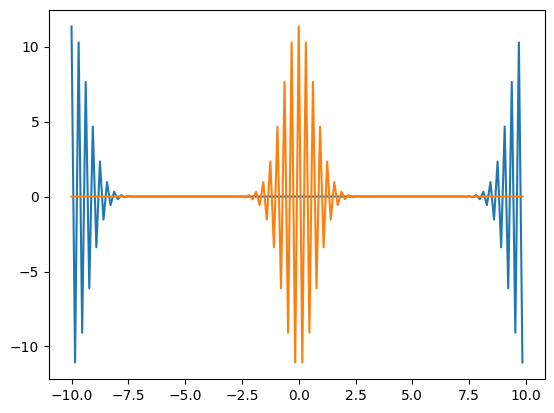

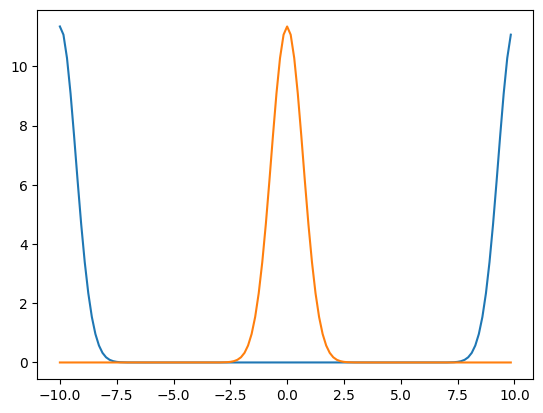

In [7]:
plt.plot(x, u)
plt.show()

plt.plot(x, ut)
plt.plot(x, utshift)
plt.show()

plt.plot(x, abs(ut))
plt.plot(x, abs(utshift))
plt.show()

Differentiation

In [8]:
def sech(x):
    return 1 / np.cosh(x)

def tanh(x):
    return np.sinh(x) / np.cosh(x)

In [9]:
L, n, len(x2), len(x)

(20, 128, 129, 128)

In [11]:
u = sech(x)
ut = np.fft.fft(u)

k = (2 * np.pi / L ) * np.concatenate((np.arange(0, n//2), np.arange(-n//2, 0)))

ut1 = 1j * k * ut
ut2 = -k**2 * ut
ut3 = -1j * k**3 * ut


u1 = np.fft.ifft(ut1)
u2 = np.fft.ifft(ut2)
u3 = np.fft.ifft(ut3)

In [12]:
u1exact = -sech(x) * tanh(x)
u2exact = None
u3exact = None

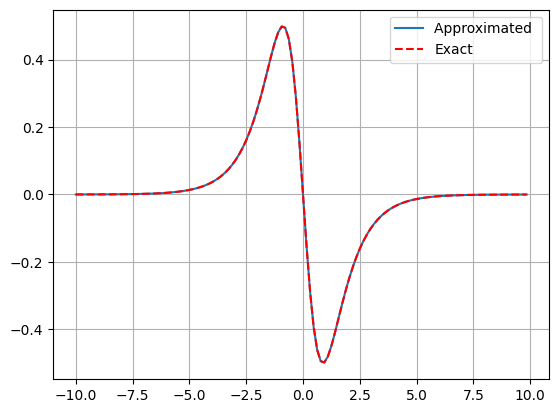

In [19]:
plt.plot(x, u1, label='Approximated ', )
plt.plot(x, u1exact, 'r--', label='Exact')
plt.grid()
plt.legend()
plt.show()

## Constructing a derivative matrix (diagonal matrix)

In [20]:
from scipy.sparse import spdiags

In [21]:
m = 5
n = m*m

e0 = np.zeros((n, 1))
e1 = np.ones((n, 1))
e2 = np.copy(e0)
e4 = np.copy(e0)


for j in range(1, m+1):
    e2[m*j-1] = 0
    e4[m*j-1] = 1


e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

diagonals = [
    e1.flatten(),
    e1.flatten(),
    e5.flatten(),
    e2.flatten(),
    -4 * e1.flatten(),
    e3.flatten(),
    e4.flatten(),
    e1.flatten(),
    e1.flatten()
]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]

matA = spdiags(diagonals, offsets, n, n).toarray()

matA

array([[-4.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0., -4.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0., -4.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      

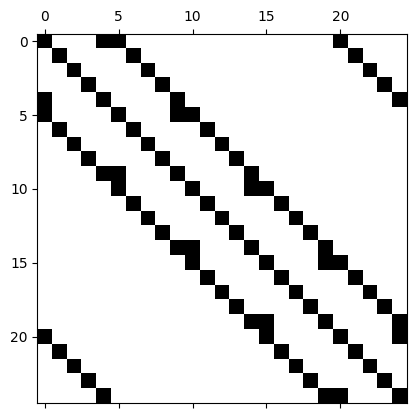

In [22]:
plt.spy(matA)
plt.show()